In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-22.537675469064405, -22.51654673986621),
 'lon': (142.92762457527194, 142.94873573793212),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 69, x: 94, y: 102)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-02T00:24:23 ...
  * y                (y) float64 -2.472e+06 -2.472e+06 -2.472e+06 -2.472e+06 ...
  * x                (x) float64 1.113e+06 1.113e+06 1.113e+06 1.113e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 1038 1015 1011 1016 1030 993 914 866 ...
    blue             (time, y, x) int16 1107 1070 1061 1070 1078 1042 962 ...
    green            (time, y, x) int16 1698 1619 1608 1625 1636 1585 1450 ...
    red              (time, y, x) int16 2391 2289 2268 2265 2274 2241 2059 ...
    nir              (time, y, x) int16 3063 2848 2791 2814 2863 2771 2469 ...
    swir1            (time, y, x) int16 3822 3726 3737 3753 3802 3842 3728 ...
    swir2            (time, y, x) int16 2582 2537 2525 2523 2543 2691 2809 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29680d4eb8>,
      dtype=object)

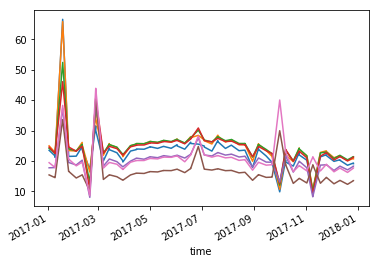

In [5]:
spee.plot(legend=False)


In [6]:
#query={'time': ('2018-02-05', '2018-02-15'),
# 'lat': (-30.595141582265763, -30.573900084400902),
# 'lon': (115.14502132590322, 115.16618234076345),
# 'output_crs': 'EPSG:3577',
# 'resampling': 'bilinear',
# 'resolution': (-25.0, 25.0)}
#sat_array2 = dc.load(product='ls8_nbar_scene', **query)
#sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
#sat_array2

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-22.537675469064405, -22.51654673986621),
 'lon': (142.92762457527194, 142.94873573793212),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 94, y: 102)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01
  * y        (y) float64 -2.472e+06 -2.472e+06 -2.472e+06 -2.472e+06 ...
  * x        (x) float64 1.113e+06 1.113e+06 1.113e+06 1.113e+06 1.113e+06 ...
Data variables:
    blue     (time, y, x) int16 1228 1270 1277 1233 1224 1154 1026 954 953 ...
    green    (time, y, x) int16 1925 1979 1992 1911 1885 1801 1567 1438 1450 ...
    red      (time, y, x) int16 2737 2800 2831 2684 2621 2560 2247 2047 2077 ...
    nir      (time, y, x) int16 3301 3306 3350 3234 3184 3003 2567 2338 2335 ...
    swir1    (time, y, x) int16 4533 4666 4713 4569 4499 4433 4128 3964 4013 ...
    swir2    (time, y, x) int16 3303 3503 3516 3370 3379 3484 3381 3301 3336 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f29640bc710>)

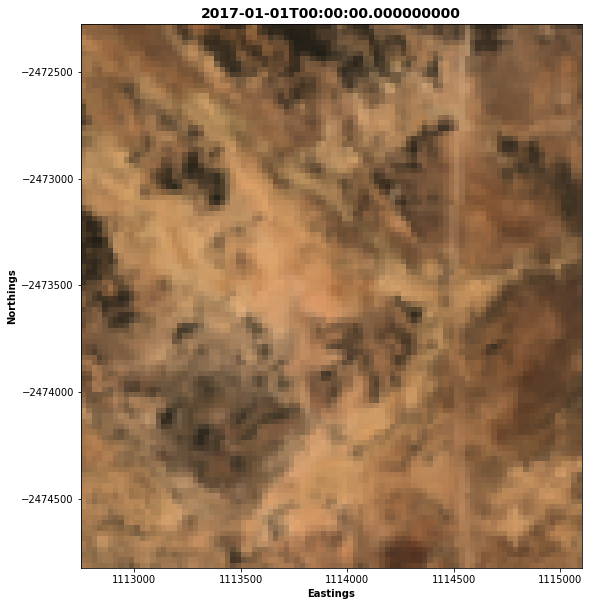

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
norm_diffo = 100*(sat_array - data.squeeze(dim='time'))/data.squeeze(dim='time')
diffo = sat_array - data.squeeze(dim='time')

In [12]:
diffo

<xarray.Dataset>
Dimensions:  (time: 69, x: 94, y: 102)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-02T00:24:23 2017-01-09T00:30:09 ...
  * y        (y) float64 -2.472e+06 -2.472e+06 -2.472e+06 -2.472e+06 ...
  * x        (x) float64 1.113e+06 1.113e+06 1.113e+06 1.113e+06 1.113e+06 ...
Data variables:
    blue     (time, y, x) int16 -121 -200 -216 -163 -146 -112 -64 -44 -54 ...
    green    (time, y, x) int16 -227 -360 -384 -286 -249 -216 -117 -94 -133 ...
    red      (time, y, x) int16 -346 -511 -563 -419 -347 -319 -188 -173 -222 ...
    nir      (time, y, x) int16 -238 -458 -559 -420 -321 -232 -98 -83 -111 ...
    swir1    (time, y, x) int16 -711 -940 -976 -816 -697 -591 -400 -361 -379 ...
    swir2    (time, y, x) int16 -721 -966 -991 -847 -836 -793 -572 -499 -528 ...

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


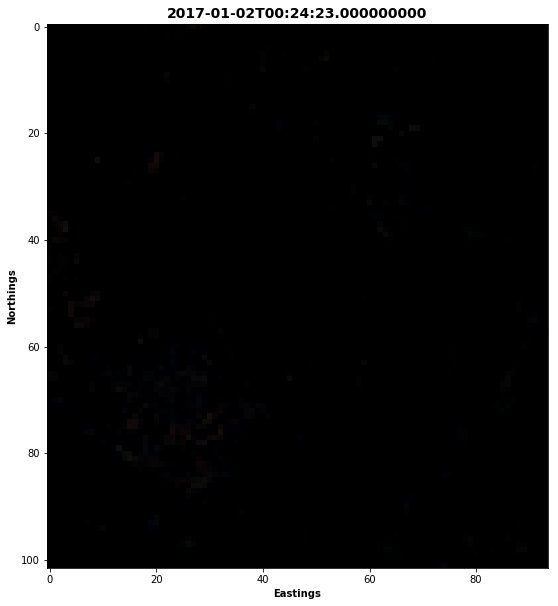

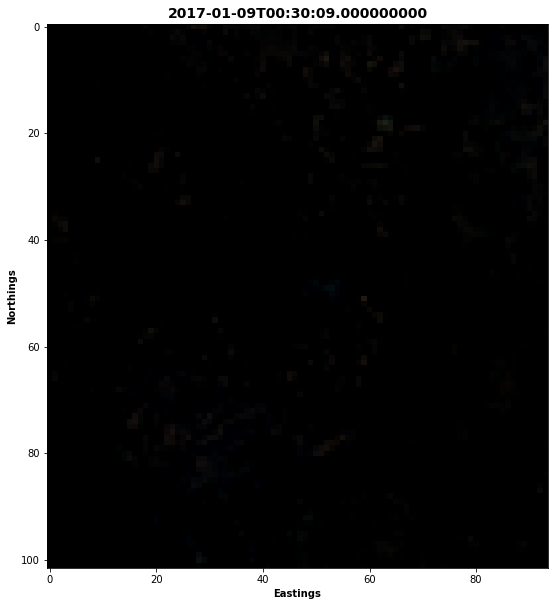

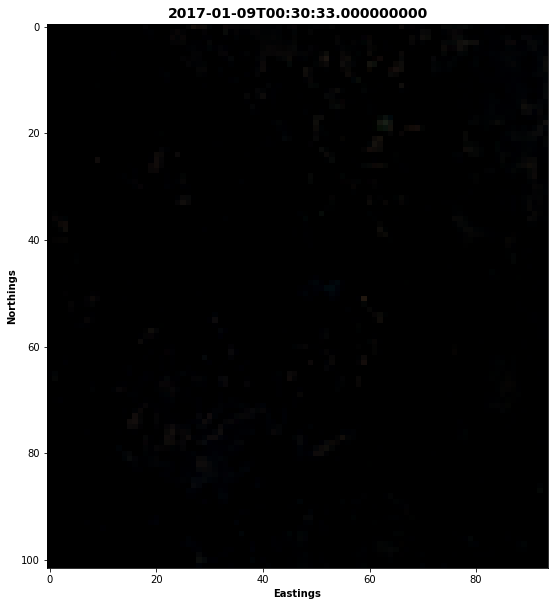

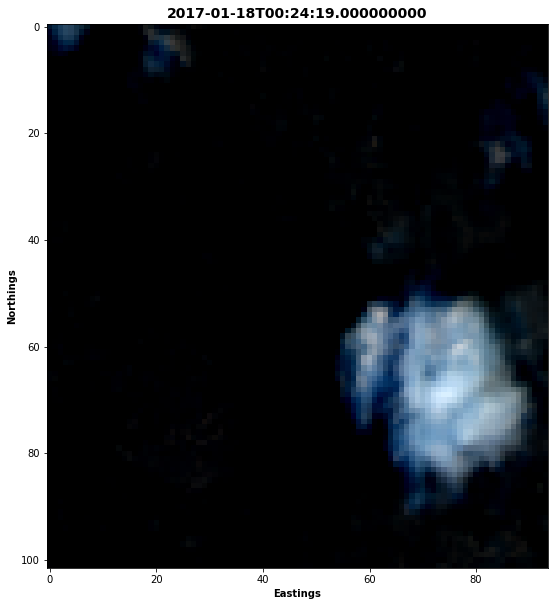

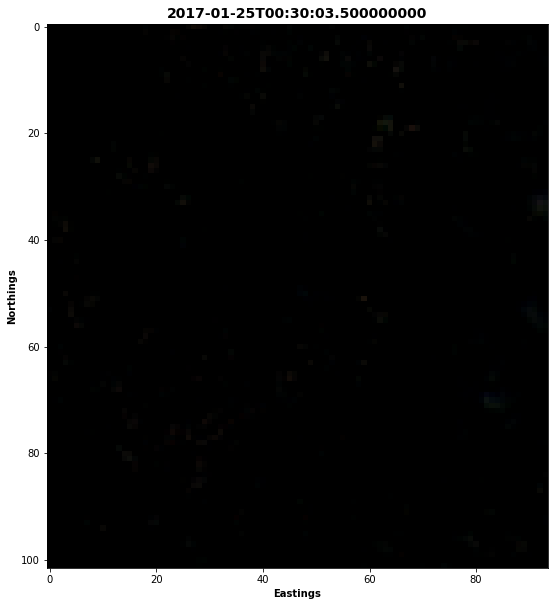

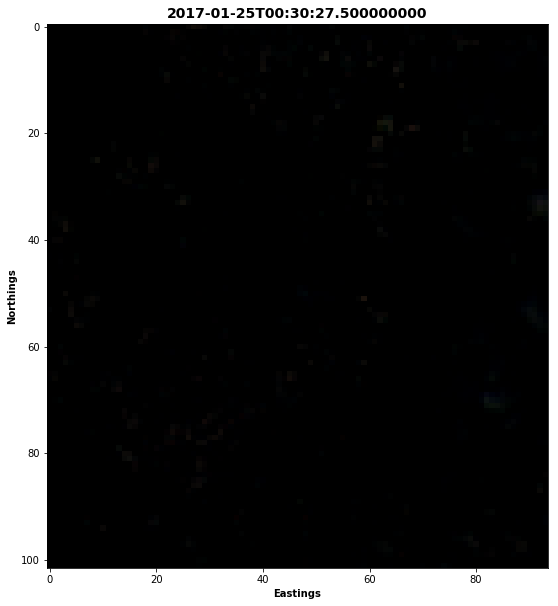

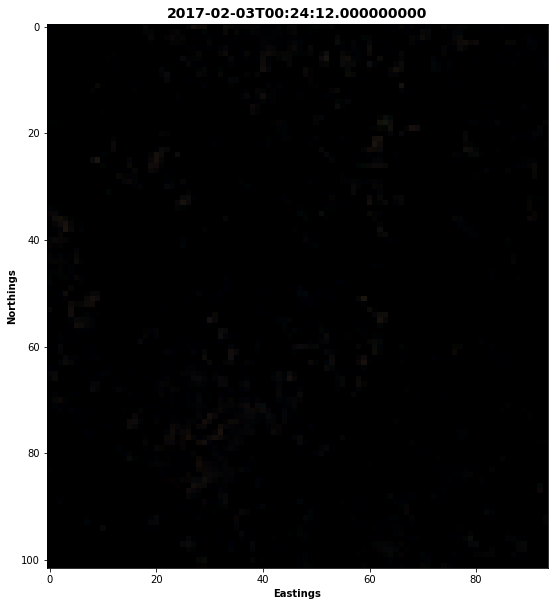

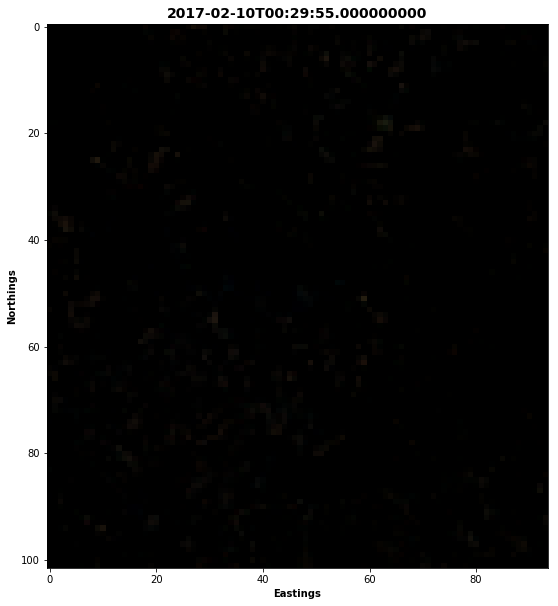

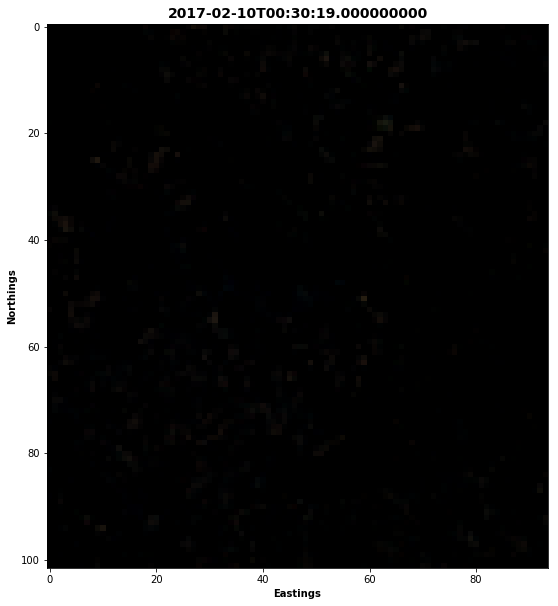

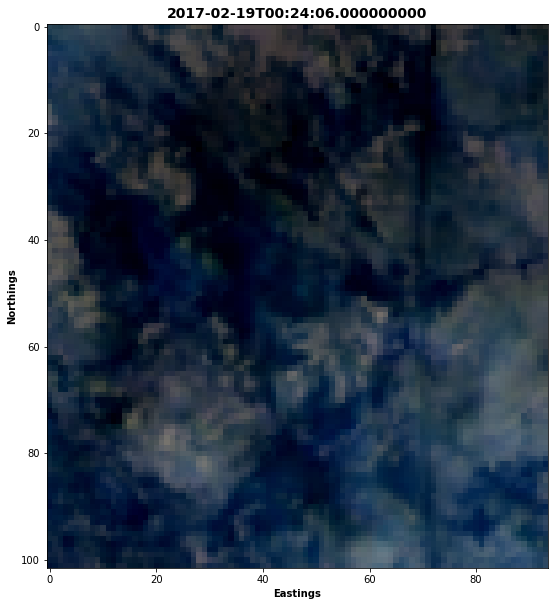

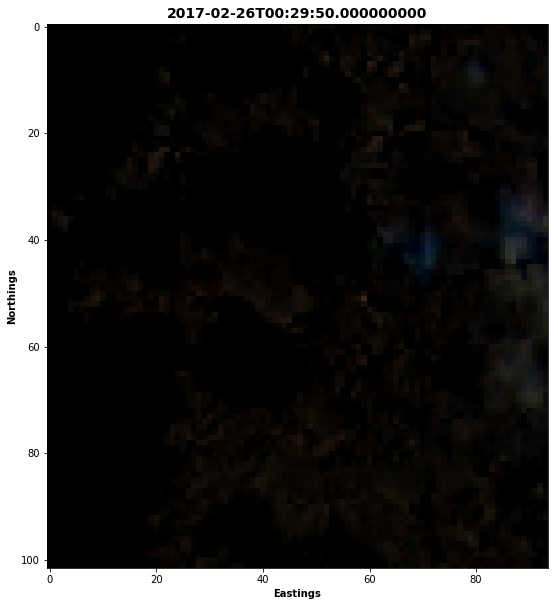

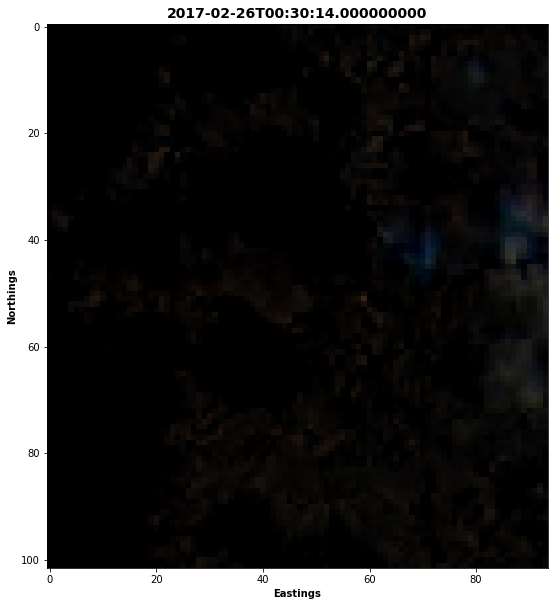

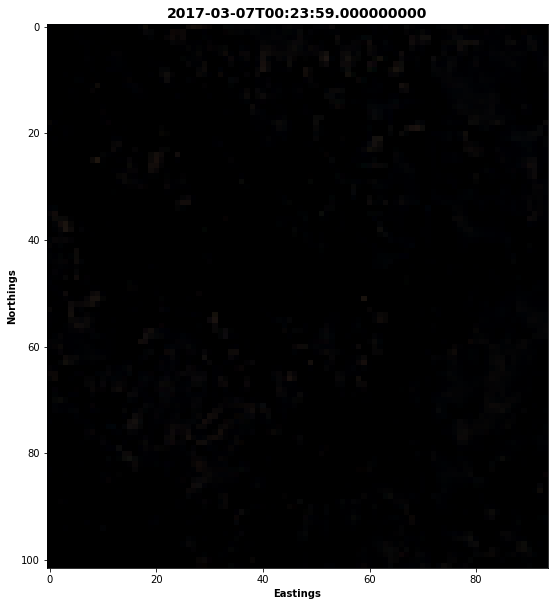

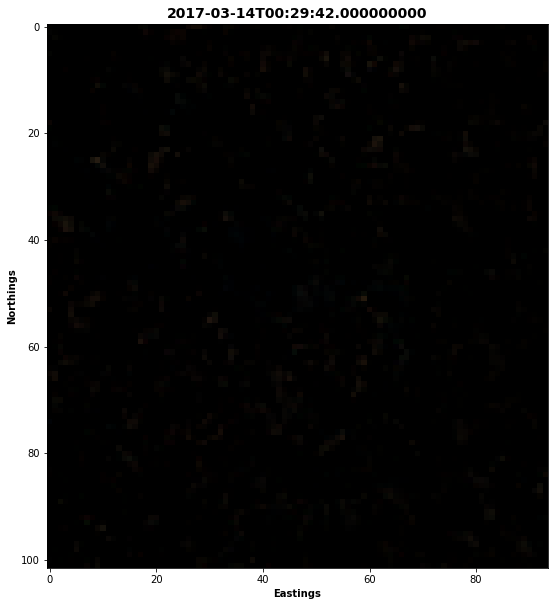

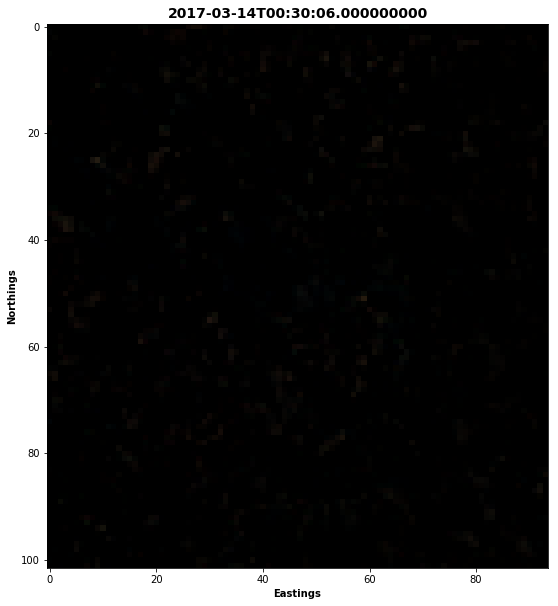

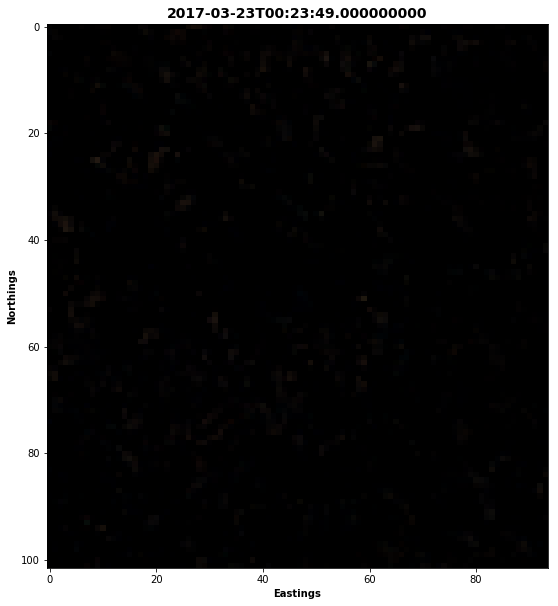

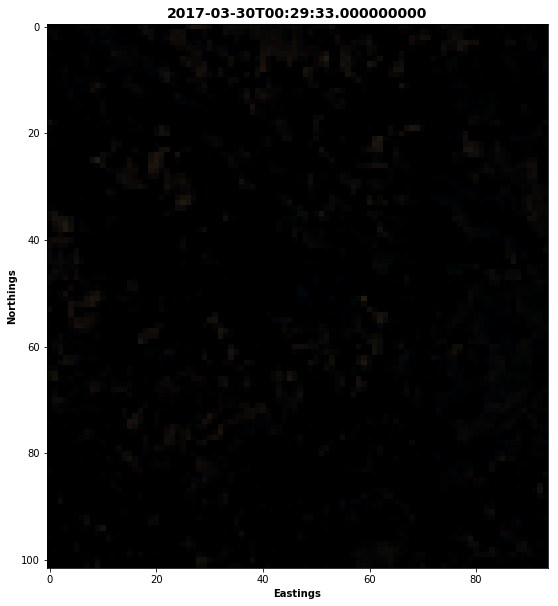

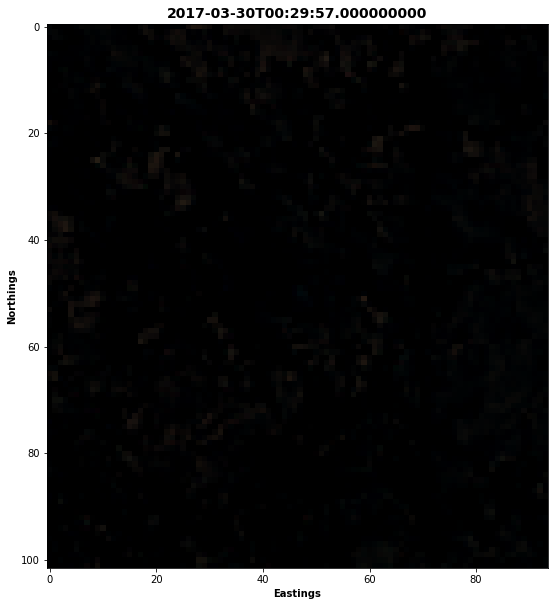

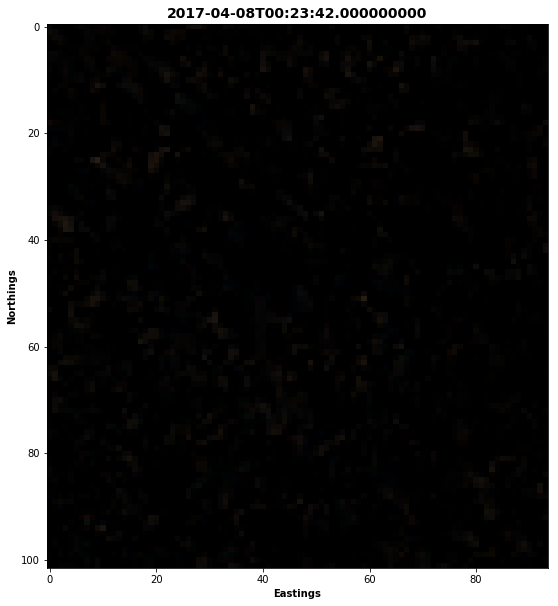

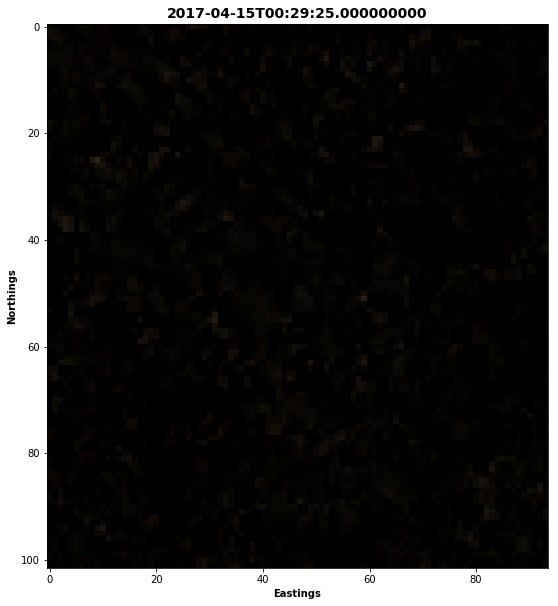

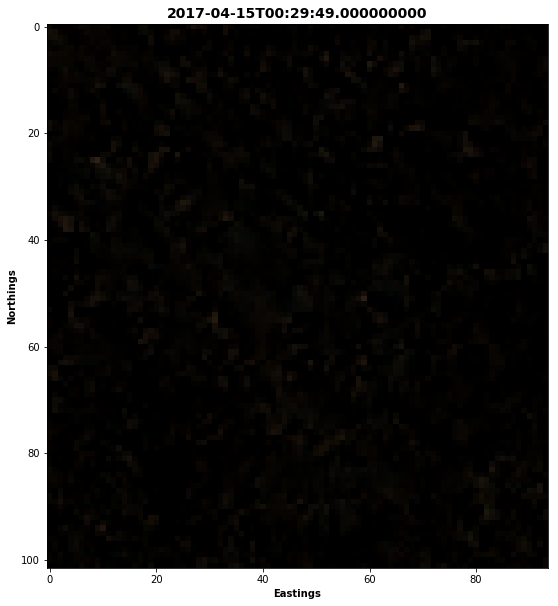

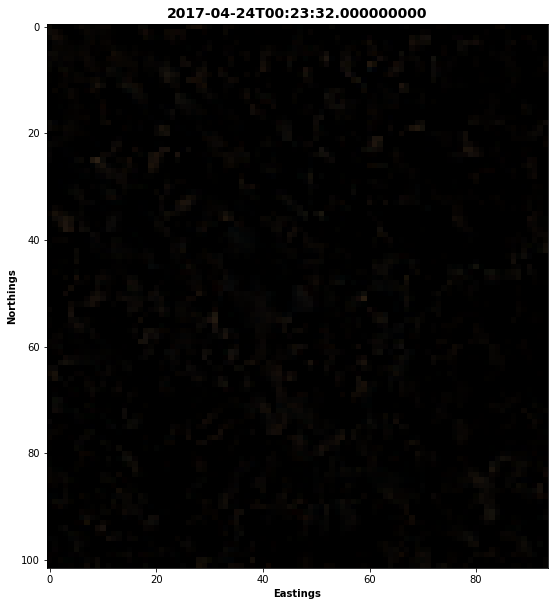

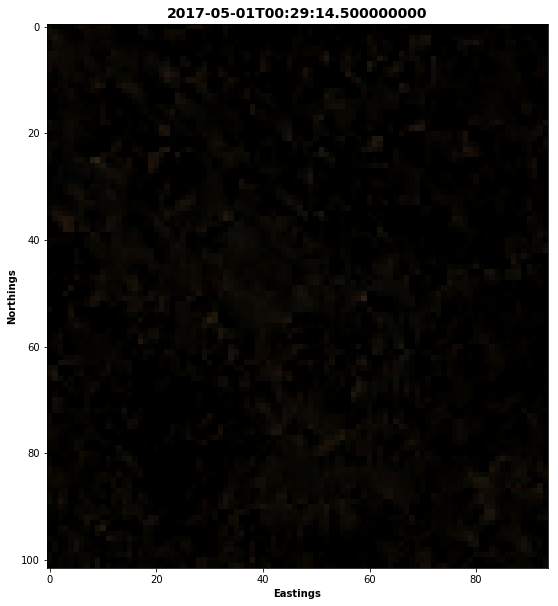

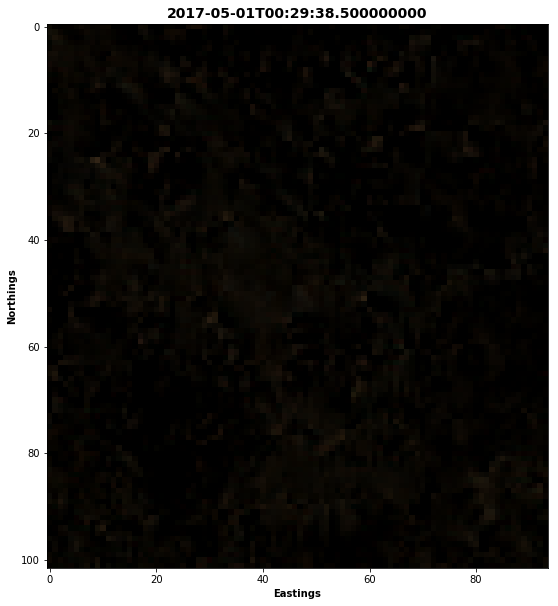

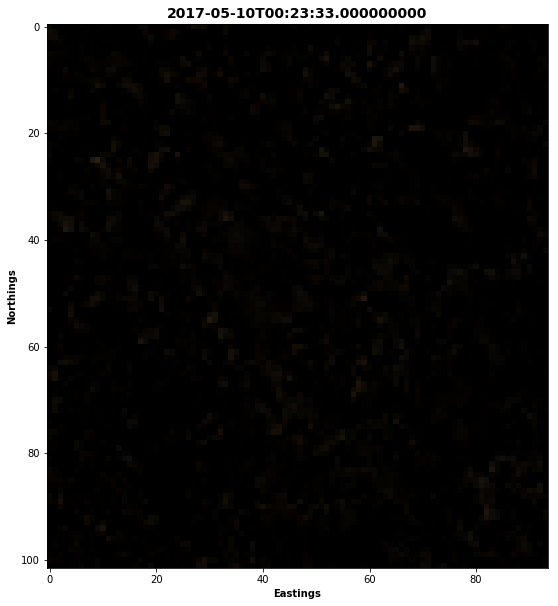

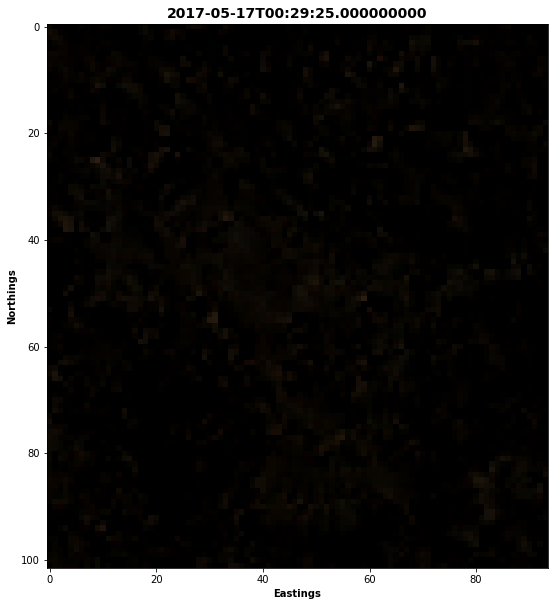

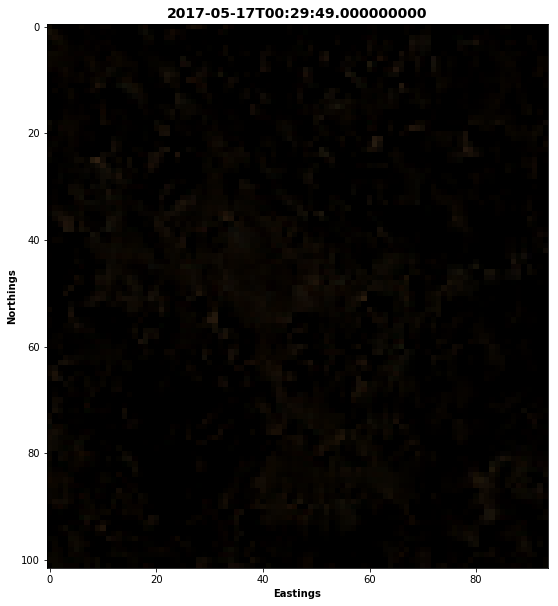

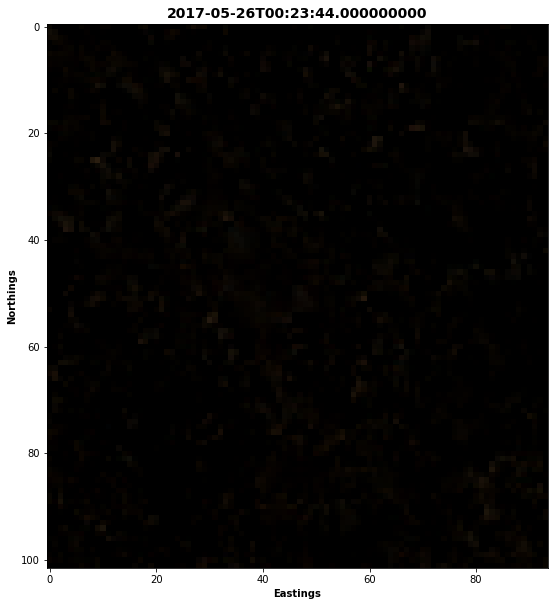

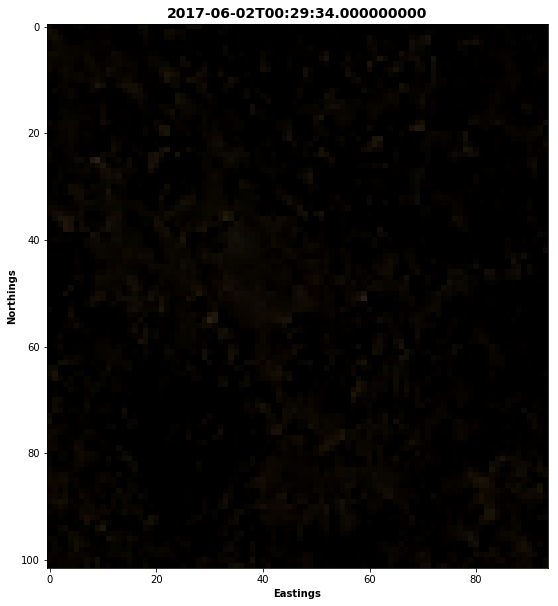

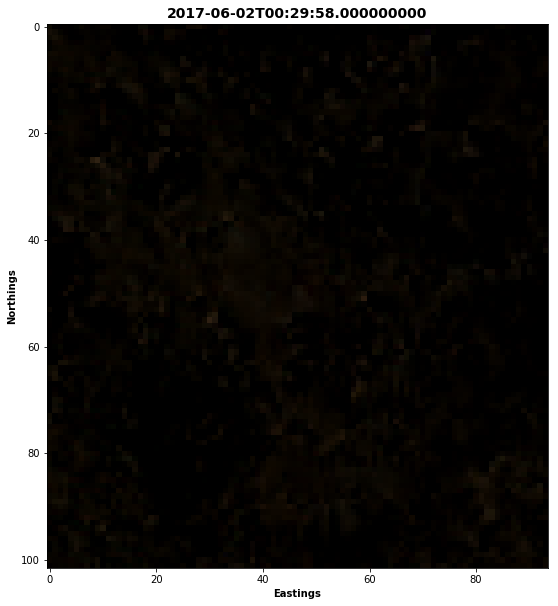

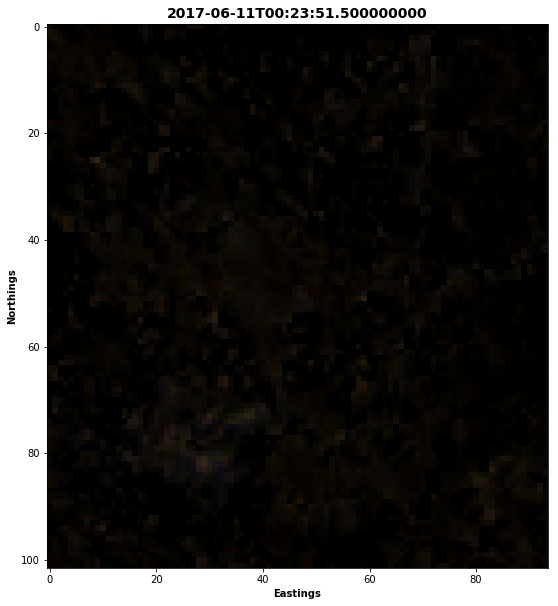

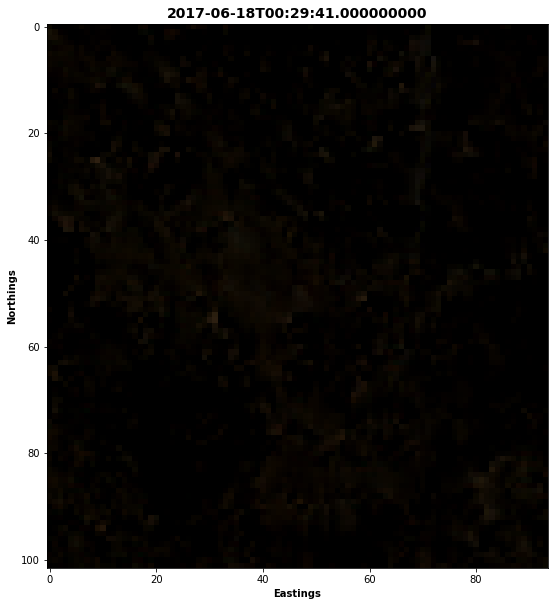

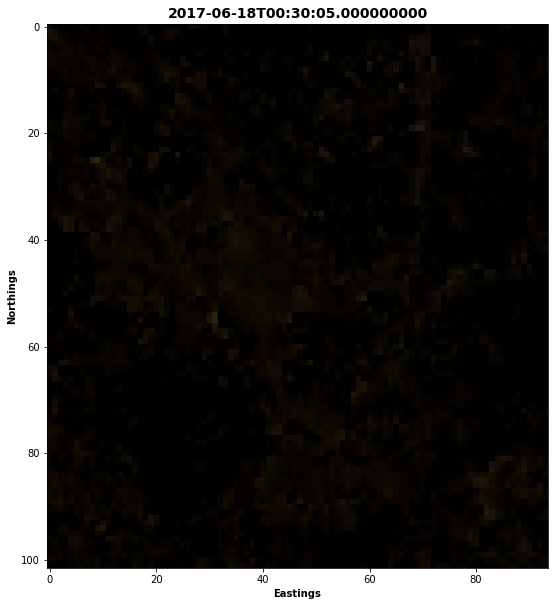

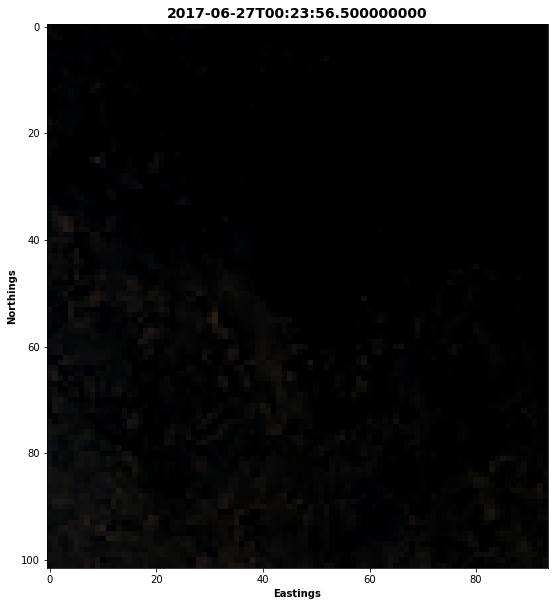

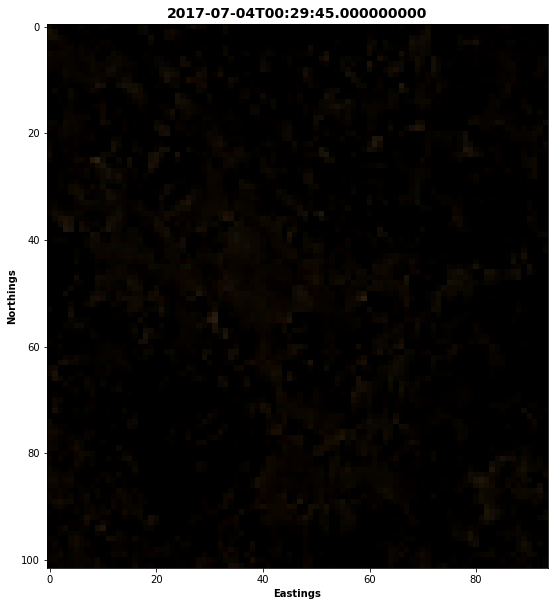

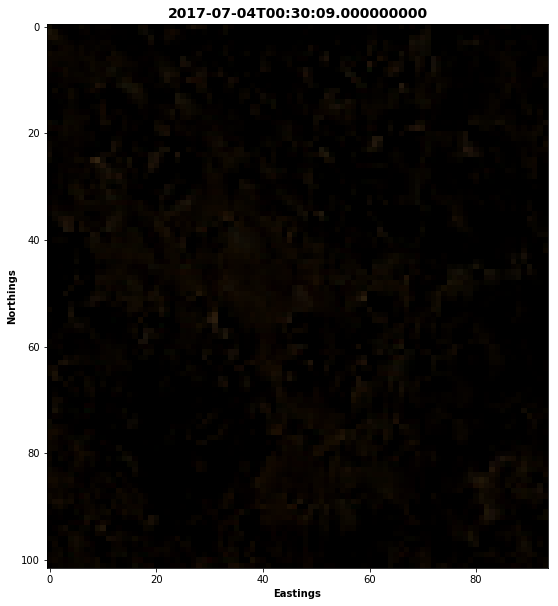

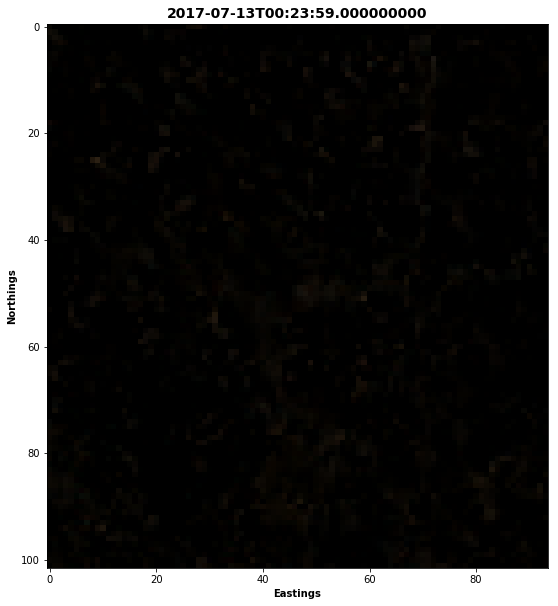

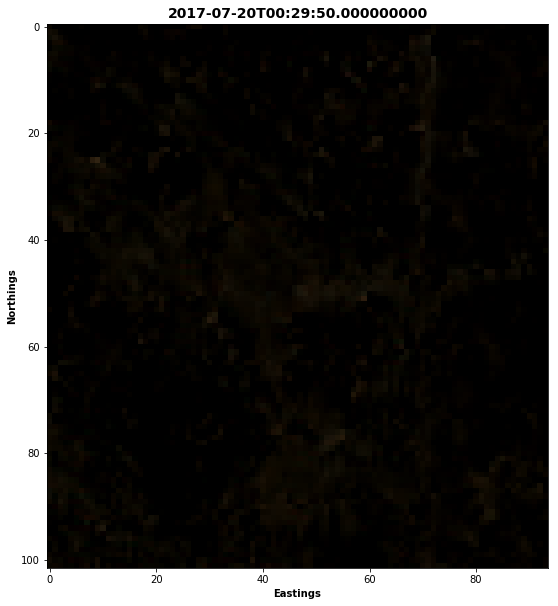

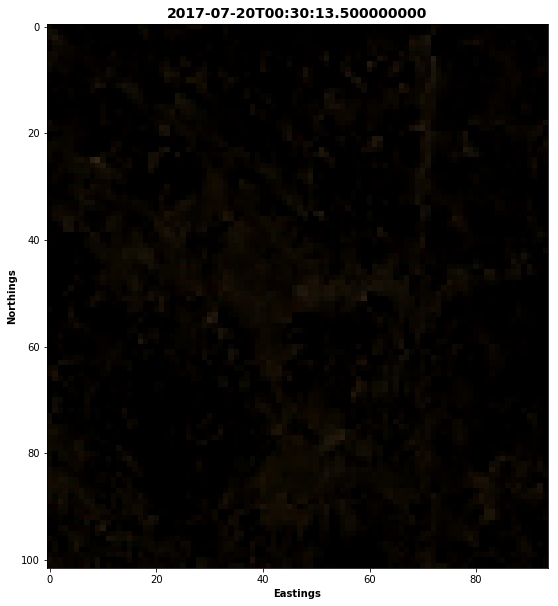

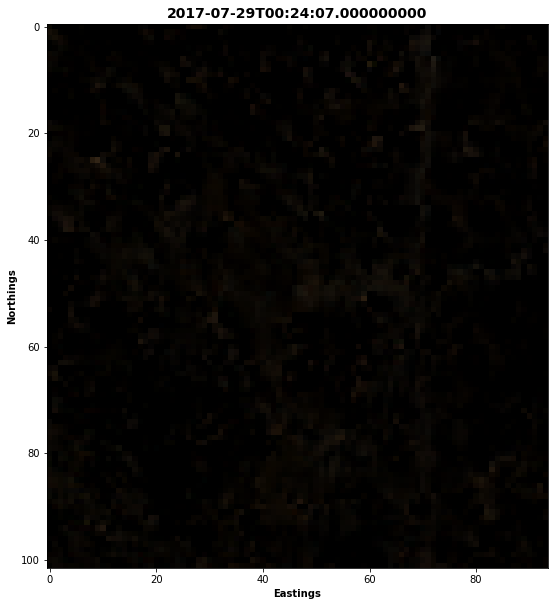

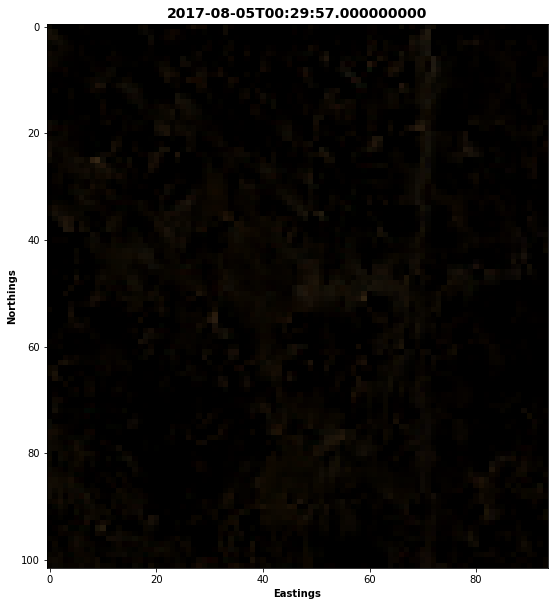

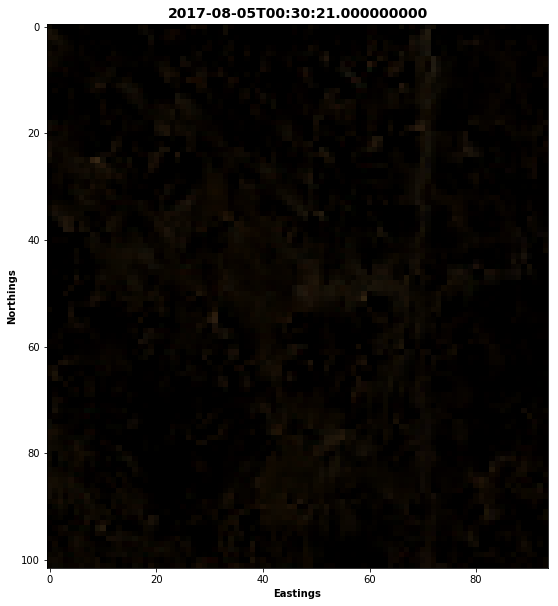

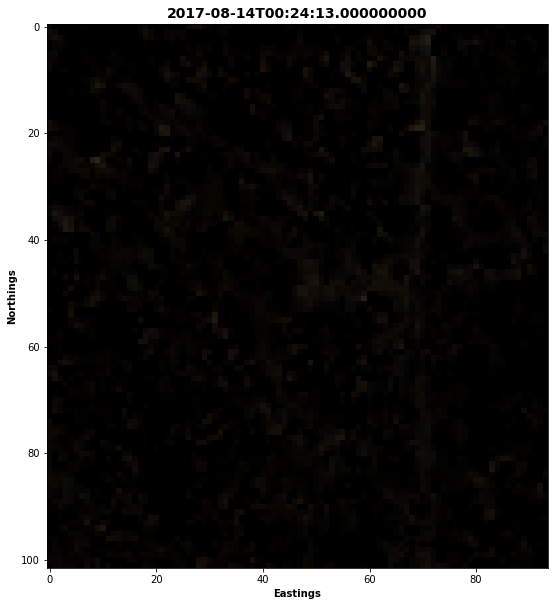

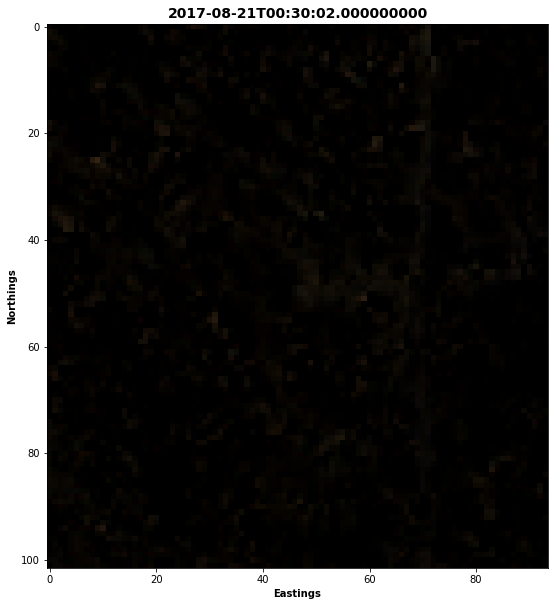

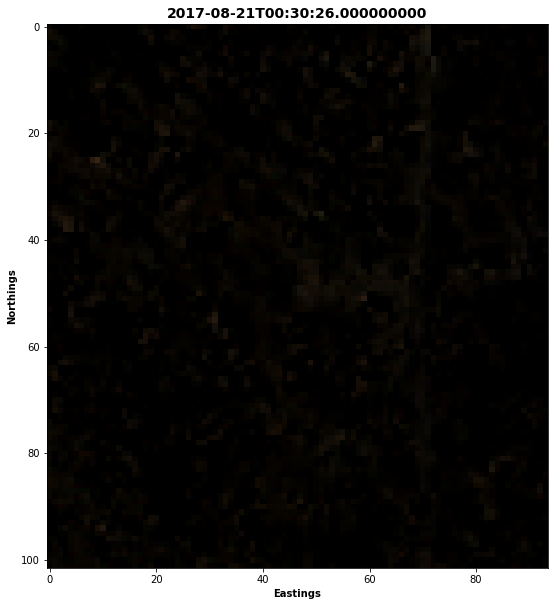

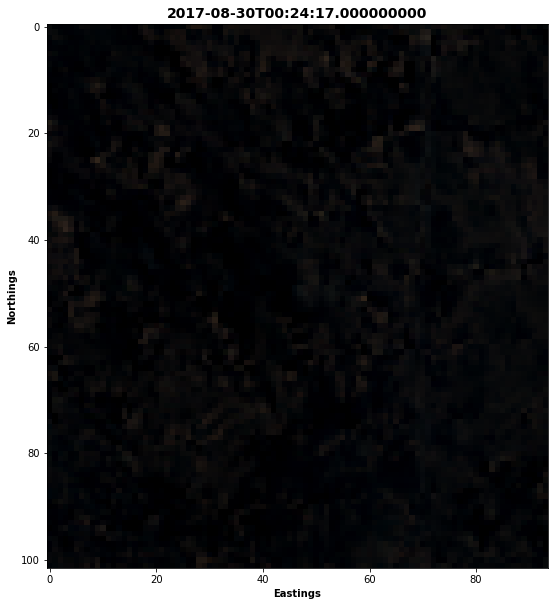

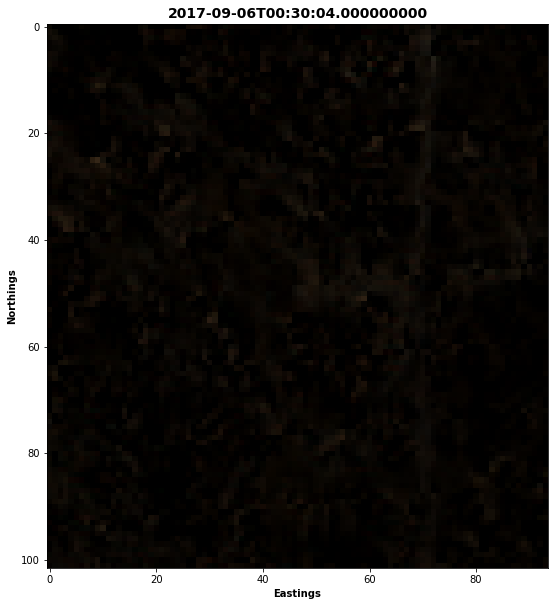

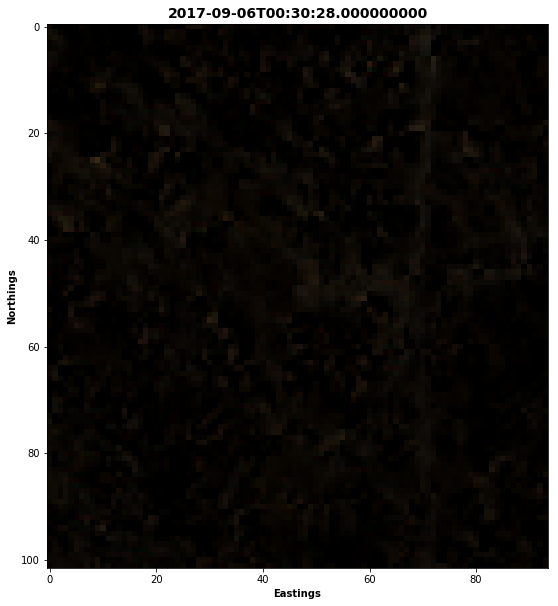

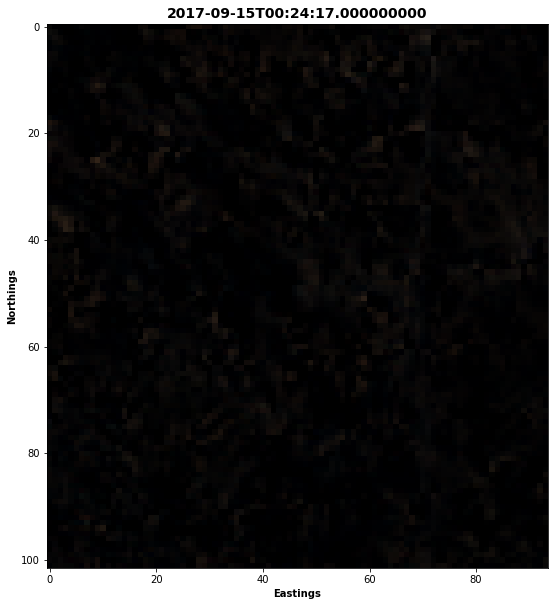

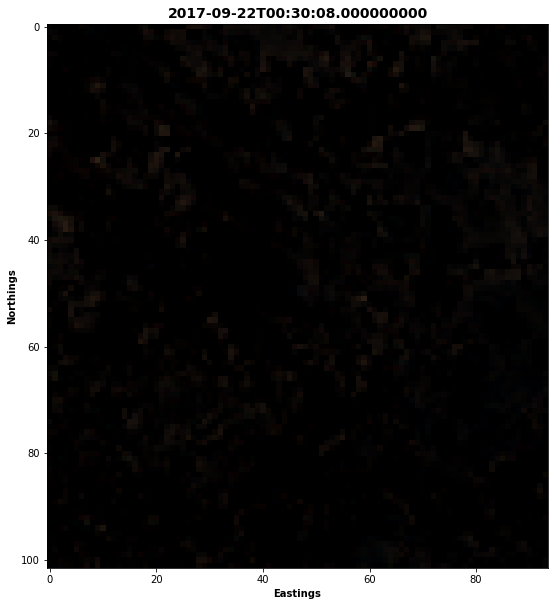

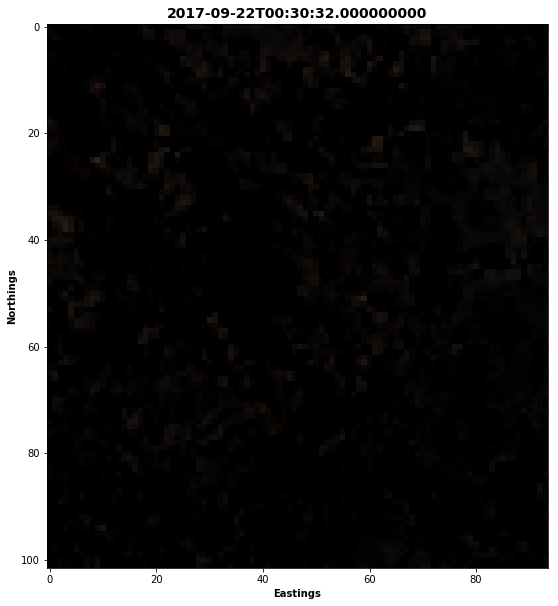

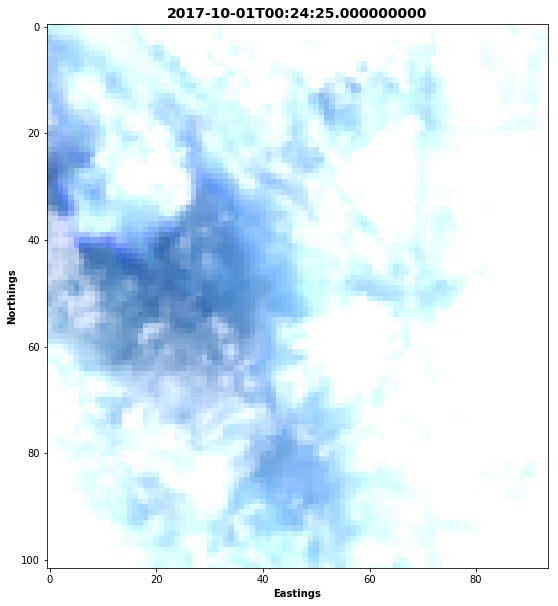

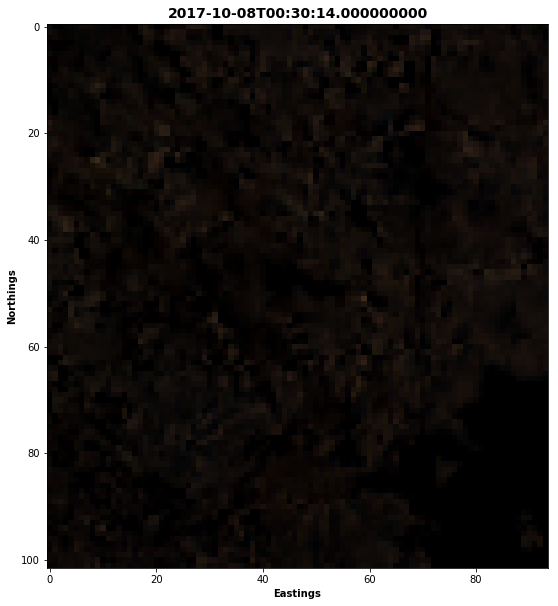

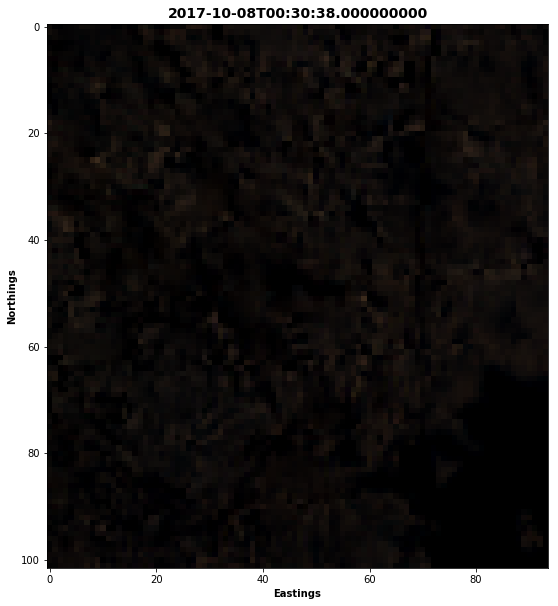

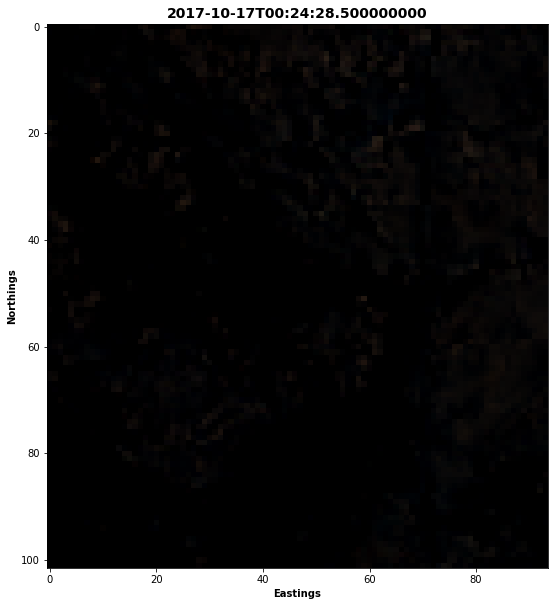

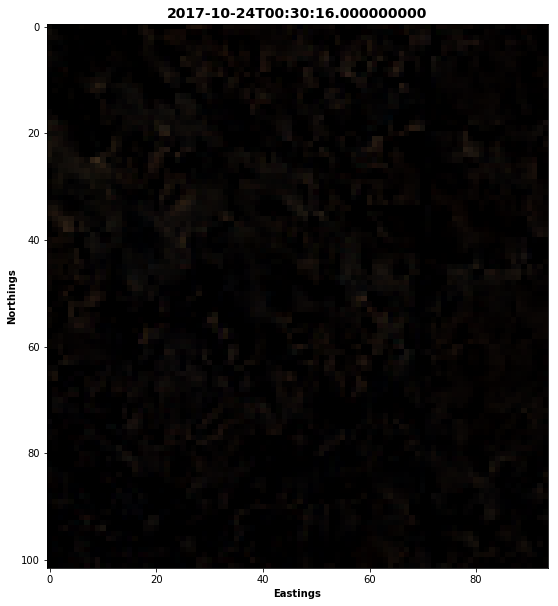

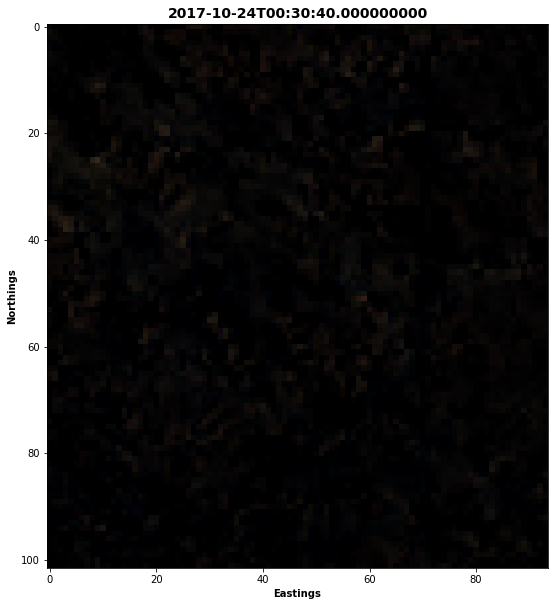

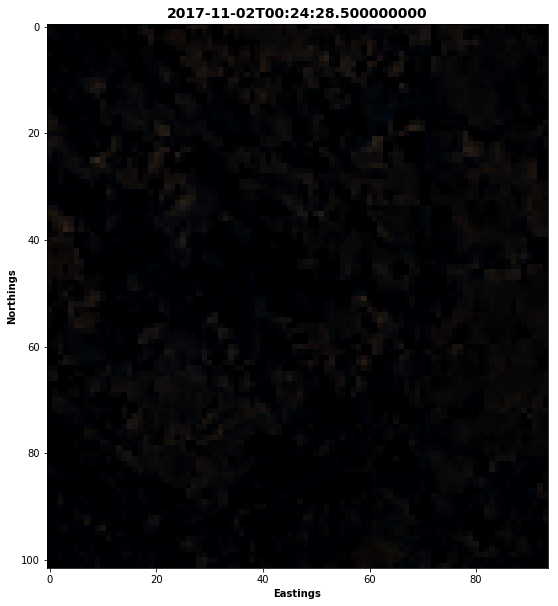

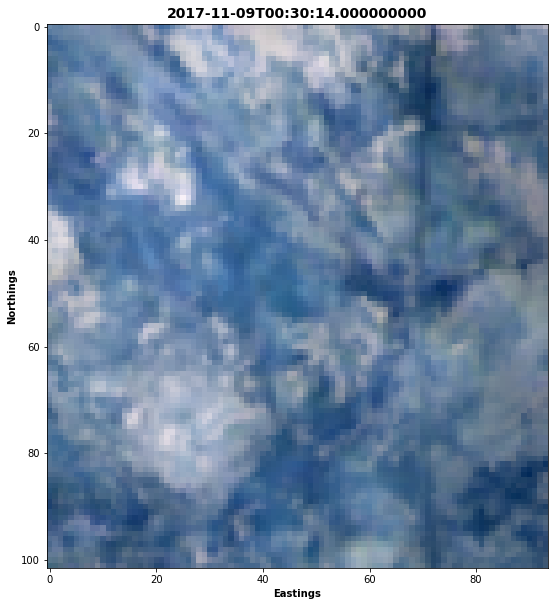

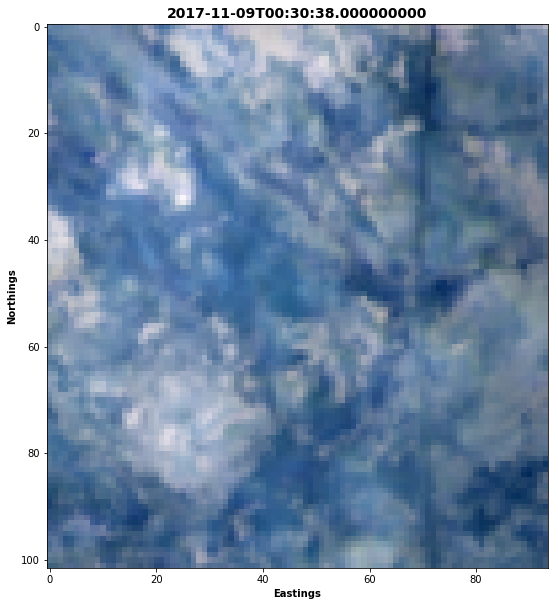

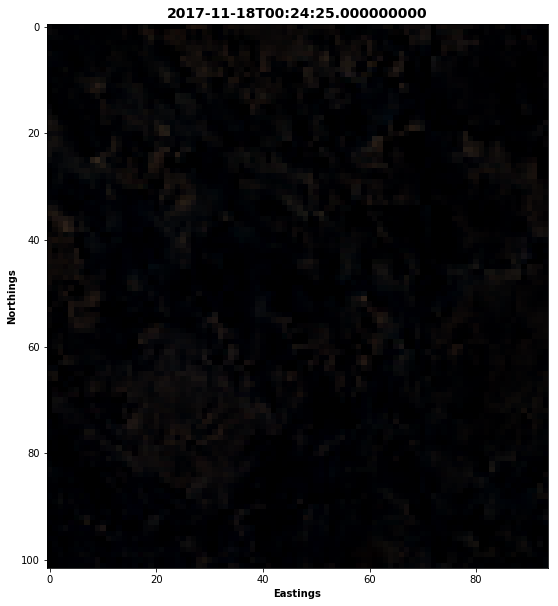

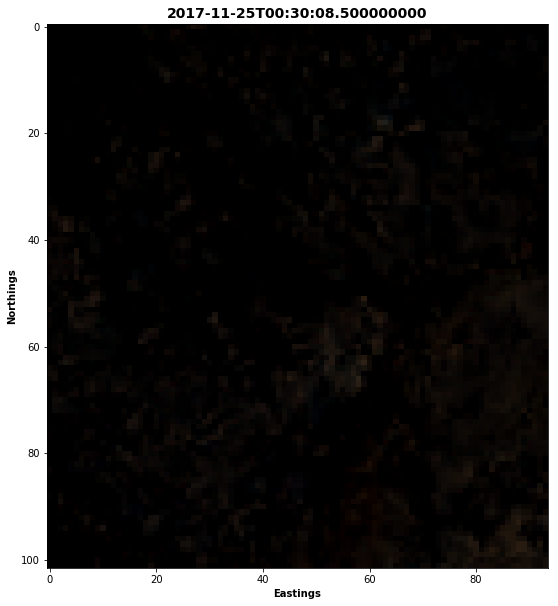

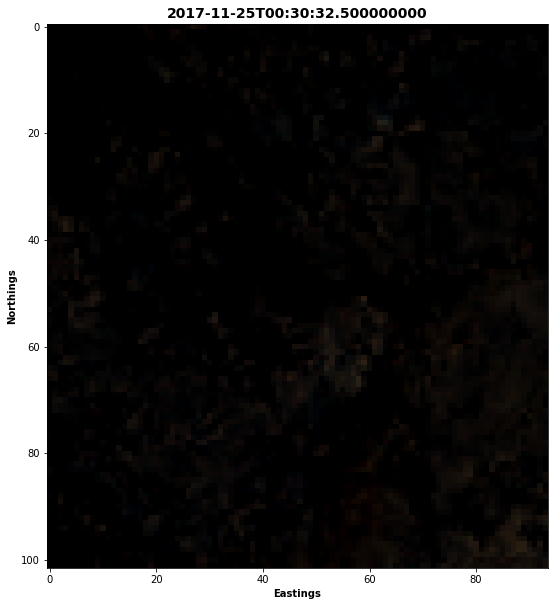

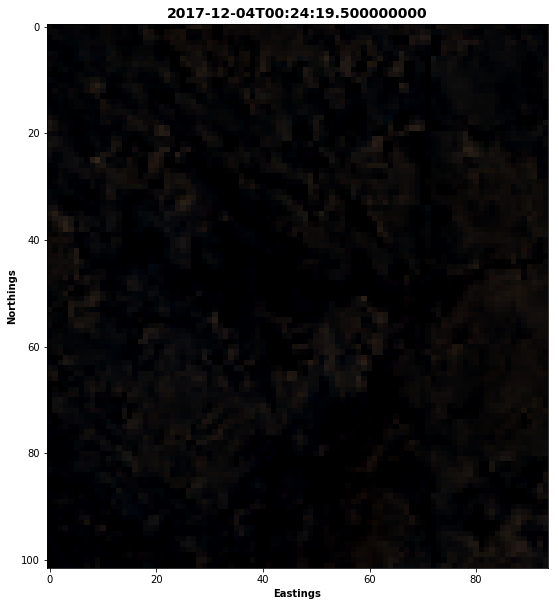

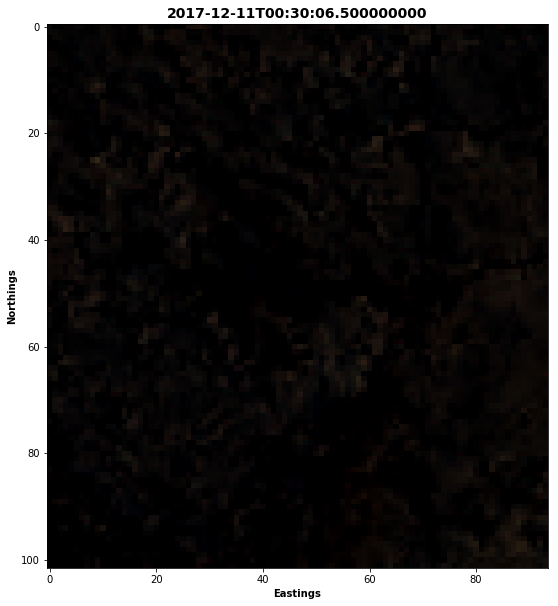

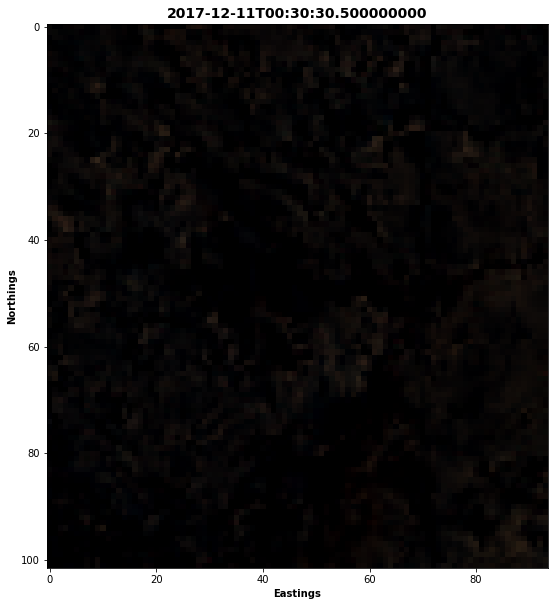

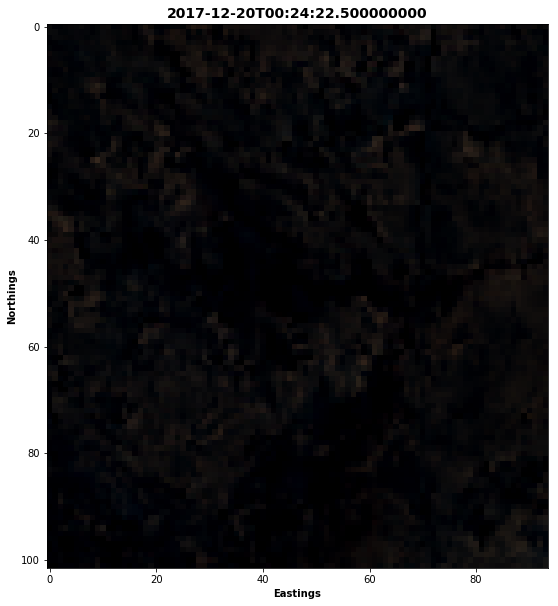

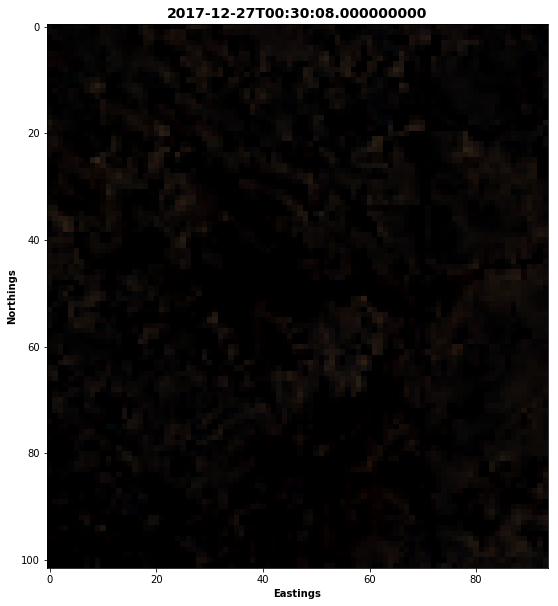

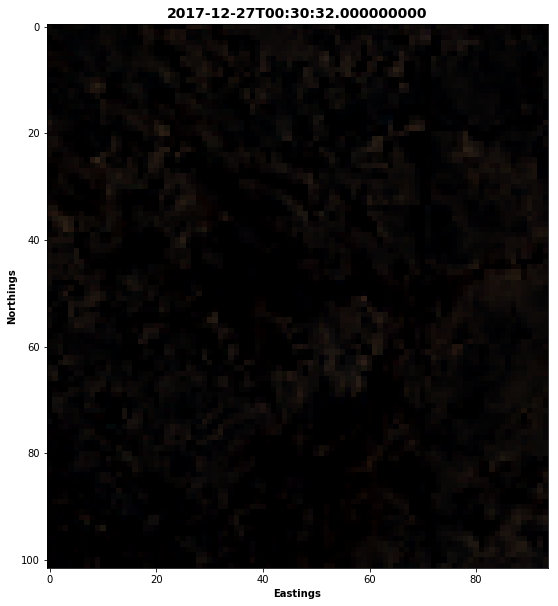

In [13]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
